In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [8]:
#!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

In [9]:
# fetch dataset 
polish_companies_bankruptcy = fetch_ucirepo(id=365) 
  
# data (as pandas dataframes) 
X = polish_companies_bankruptcy.data.features 
y = polish_companies_bankruptcy.data.targets 
  
# metadata 
print(polish_companies_bankruptcy.metadata) 
  
# variable information 
print(polish_companies_bankruptcy.variables)

{'uci_id': 365, 'name': 'Polish Companies Bankruptcy', 'repository_url': 'https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data', 'data_url': 'https://archive.ics.uci.edu/static/public/365/data.csv', 'abstract': 'The dataset is about bankruptcy prediction of Polish companies.The bankrupt companies were analyzed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 10503, 'num_features': 65, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2016, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C5F600', 'creators': ['Sebastian Tomczak'], 'intro_paper': {'ID': 417, 'type': 'NATIVE', 'title': 'Ensemble boosted trees with synthetic features generation in application to bankruptcy predictio

In [10]:
cleaned_feature_names = [
    "net_profit_total_assets",
    "total_liabilities_total_assets",
    "working_capital_total_assets",
    "current_assets_short_term_liabilities",
    "liquidity_ratio_days",
    "retained_earnings_total_assets",
    "ebit_total_assets",
    "equity_total_liabilities",
    "sales_total_assets",
    "equity_total_assets",
    "gross_profit_plus_extra_items_fin_expenses_total_assets",
    "gross_profit_short_term_liabilities",
    "gross_profit_plus_depreciation_sales",
    "gross_profit_plus_interest_total_assets",
    "liabilities_days_gross_profit_plus_depreciation",
    "gross_profit_plus_depreciation_total_liabilities",
    "total_assets_total_liabilities",
    "gross_profit_total_assets",
    "gross_profit_sales",
    "inventory_days_sales",
    "sales_growth",
    "operating_profit_total_assets",
    "net_profit_sales",
    "gross_profit_3yr_total_assets",
    "equity_minus_share_capital_total_assets",
    "net_profit_plus_depreciation_total_liabilities",
    "operating_profit_financial_expenses",
    "working_capital_fixed_assets",
    "log_total_assets",
    "liabilities_minus_cash_sales",
    "gross_profit_plus_interest_sales",
    "current_liabilities_days_cost_of_products_sold",
    "operating_expenses_short_term_liabilities",
    "operating_expenses_total_liabilities",
    "profit_on_sales_total_assets",
    "total_sales_total_assets",
    "current_assets_minus_inventories_long_term_liabilities",
    "constant_capital_total_assets",
    "profit_on_sales_sales",
    "quick_ratio_like",
    "liabilities_operating_profit_plus_depreciation_annualized",
    "operating_profit_sales",
    "receivables_plus_inventory_turnover_days",
    "receivables_days_sales",
    "net_profit_inventory",
    "current_assets_minus_inventory_short_term_liabilities",
    "inventory_days_cost_of_products_sold",
    "ebitda_total_assets",
    "ebitda_sales",
    "current_assets_total_liabilities",
    "short_term_liabilities_total_assets",
    "short_term_liabilities_days_cost_of_products_sold",
    "equity_fixed_assets",
    "constant_capital_fixed_assets",
    "working_capital",
    "gross_margin",
    "net_liquidity_ratio_variant",
    "total_costs_total_sales",
    "long_term_liabilities_equity",
    "sales_inventory",
    "sales_receivables",
    "short_term_liabilities_days_sales",
    "sales_short_term_liabilities",
    "sales_fixed_assets"
]

cleaned_column_names_with_year = ['year'] + cleaned_feature_names

In [11]:
# Rename columns
X.columns = cleaned_column_names_with_year
y.columns = ['bankruptcy']

In [12]:
X.isna().sum()

year                                        0
net_profit_total_assets                     8
total_liabilities_total_assets              8
working_capital_total_assets                8
current_assets_short_term_liabilities     134
                                         ... 
sales_inventory                          2152
sales_receivables                         102
short_term_liabilities_days_sales         127
sales_short_term_liabilities              134
sales_fixed_assets                        812
Length: 65, dtype: int64

In [13]:
year_col = X['year']
X_no_year = X.drop(columns=['year'])

In [14]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_imputed_array = imputer.fit_transform(X_no_year)

In [15]:
X_imputed = pd.DataFrame(X_imputed_array, columns=X_no_year.columns)

X_imputed['year'] = year_col.values

cols = ['year'] + [col for col in X_imputed.columns if col != 'year']
X_imputed = X_imputed[cols]

X = X_imputed

In [16]:
X.isna().sum()

year                                     0
net_profit_total_assets                  0
total_liabilities_total_assets           0
working_capital_total_assets             0
current_assets_short_term_liabilities    0
                                        ..
sales_inventory                          0
sales_receivables                        0
short_term_liabilities_days_sales        0
sales_short_term_liabilities             0
sales_fixed_assets                       0
Length: 65, dtype: int64

In [17]:
X.shape

(43405, 65)

In [18]:
X.info

<bound method DataFrame.info of        year  net_profit_total_assets  total_liabilities_total_assets  \
0         1                 0.200550                         0.37951   
1         1                 0.209120                         0.49988   
2         1                 0.248660                         0.69592   
3         1                 0.081483                         0.30734   
4         1                 0.187320                         0.61323   
...     ...                      ...                             ...   
43400     5                 0.012898                         0.70621   
43401     5                -0.578050                         0.96702   
43402     5                -0.179050                         1.25530   
43403     5                -0.108860                         0.74394   
43404     5                -0.105370                         0.53629   

       working_capital_total_assets  current_assets_short_term_liabilities  \
0                        

In [19]:
X.describe()

,year,net_profit_total_assets,total_liabilities_total_assets,working_capital_total_assets,current_assets_short_term_liabilities,liquidity_ratio_days,retained_earnings_total_assets,ebit_total_assets,equity_total_liabilities,sales_total_assets,...,working_capital,gross_margin,net_liquidity_ratio_variant,total_costs_total_sales,long_term_liabilities_equity,sales_inventory,sales_receivables,short_term_liabilities_days_sales,sales_short_term_liabilities,sales_fixed_assets
count,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,4.340500e+04,43405.000000,43405.000000,43405.000000,43405.000000,...,4.340500e+04,4.340500e+04,43405.000000,4.340500e+04,43405.000000,4.340500e+04,43405.000000,4.340500e+04,43405.000000,43405.000000
mean,2.939753,0.035160,0.590212,0.114431,6.314702,-3.853480e+02,-0.056107,0.093478,12.640779,2.652166,...,7.672346e+03,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.481067e+02,17.033202,1.502521e+03,9.343074,72.796105
std,1.283975,2.993833,5.842209,5.438928,294.978029,6.116516e+04,7.200663,5.712548,505.346176,62.926207,...,7.005268e+04,5.320062e+03,13.672969,5.329289e+03,122.094599,3.153314e+04,552.399187,1.390984e+05,123.985521,2347.473406
min,1.000000,-463.890000,-430.870000,-479.960000,-0.403110,-1.190000e+07,-508.410000,-517.480000,-141.410000,-3.496000,...,-1.810000e+06,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.340000e+06,-1.543200,-10677.000000
25%,2.000000,0.003434,0.269010,0.021540,1.050800,-4.949000e+01,0.000000,0.005783,0.431070,1.018500,...,2.757300e+01,8.959000e-03,0.014632,8.755400e-01,0.000000,5.729400e+00,4.515600,4.220500e+01,3.100200,2.207800
50%,3.000000,0.049636,0.471940,0.196580,1.574000,-1.184000e+00,0.000000,0.059653,1.074100,1.195500,...,1.088400e+03,5.270100e-02,0.119650,9.511200e-01,0.006389,1.040000e+01,6.649500,7.153500e+01,5.102900,4.389200
75%,4.000000,0.129560,0.688270,0.403260,2.806000,5.046100e+01,0.089441,0.150810,2.639100,2.063000,...,4.993700e+03,1.287800e-01,0.284570,9.928000e-01,0.236280,2.389000e+01,10.443000,1.177400e+02,8.650900,10.461000
max,5.000000,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,...,6.120000e+06,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000


In [20]:
pd.set_option('display.max_columns', None)

In [21]:
column_rename_dict = {
    'net_profit_total_assets': 'net profit / total assets',
    'total_liabilities_total_assets': 'total liabilities / total assets',
    'working_capital_total_assets': 'working capital / total assets',
    'current_assets_short_term_liabilities': 'current assets / short-term liabilities',
    'liquidity_ratio_days': '[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365',
    'retained_earnings_total_assets': 'retained earnings / total assets',
    'ebit_total_assets': 'EBIT / total assets',
    'equity_total_liabilities': 'book value of equity / total liabilities',
    'sales_total_assets': 'sales / total assets',
    'equity_total_assets': 'equity / total assets',
    'gross_profit_plus_extra_items_fin_expenses_total_assets': '(gross profit + extraordinary items + financial expenses) / total assets',
    'gross_profit_short_term_liabilities': 'gross profit / short-term liabilities',
    'gross_profit_plus_depreciation_sales': '(gross profit + depreciation) / sales',
    'gross_profit_plus_interest_total_assets': '(gross profit + interest) / total assets',
    'liabilities_days_gross_profit_plus_depreciation': '(total liabilities * 365) / (gross profit + depreciation)',
    'gross_profit_plus_depreciation_total_liabilities': '(gross profit + depreciation) / total liabilities',
    'total_assets_total_liabilities': 'total assets / total liabilities',
    'gross_profit_total_assets': 'gross profit / total assets',
    'gross_profit_sales': 'gross profit / sales',
    'inventory_days_sales': '(inventory * 365) / sales',
    'sales_growth': 'sales (n) / sales (n-1)',
    'operating_profit_total_assets': 'profit on operating activities / total assets',
    'net_profit_sales': 'net profit / sales',
    'gross_profit_3yr_total_assets': 'gross profit (in 3 years) / total assets',
    'equity_minus_share_capital_total_assets': '(equity - share capital) / total assets',
    'net_profit_plus_depreciation_total_liabilities': '(net profit + depreciation) / total liabilities',
    'operating_profit_financial_expenses': 'profit on operating activities / financial expenses',
    'working_capital_fixed_assets': 'working capital / fixed assets',
    'log_total_assets': 'logarithm of total assets',
    'liabilities_minus_cash_sales': '(total liabilities - cash) / sales',
    'gross_profit_plus_interest_sales': '(gross profit + interest) / sales',
    'current_liabilities_days_cost_of_products_sold': '(current liabilities * 365) / cost of products sold',
    'operating_expenses_short_term_liabilities': 'operating expenses / short-term liabilities',
    'operating_expenses_total_liabilities': 'operating expenses / total liabilities',
    'profit_on_sales_total_assets': 'profit on sales / total assets',
    'total_sales_total_assets': 'total sales / total assets',
    'current_assets_minus_inventories_long_term_liabilities': '(current assets - inventories) / long-term liabilities',
    'constant_capital_total_assets': 'constant capital / total assets',
    'profit_on_sales_sales': 'profit on sales / sales',
    'quick_ratio_like': '(current assets - inventory - receivables) / short-term liabilities',
    'liabilities_operating_profit_plus_depreciation_annualized': 'total liabilities / ((profit on operating activities + depreciation) * (12/365))',
    'operating_profit_sales': 'profit on operating activities / sales',
    'receivables_plus_inventory_turnover_days': 'rotation receivables + inventory turnover in days',
    'receivables_days_sales': '(receivables * 365) / sales',
    'net_profit_inventory': 'net profit / inventory',
    'current_assets_minus_inventory_short_term_liabilities': '(current assets - inventory) / short-term liabilities',
    'inventory_days_cost_of_products_sold': '(inventory * 365) / cost of products sold',
    'ebitda_total_assets': 'EBITDA (profit on operating activities - depreciation) / total assets',
    'ebitda_sales': 'EBITDA (profit on operating activities - depreciation) / sales',
    'current_assets_total_liabilities': 'current assets / total liabilities',
    'short_term_liabilities_total_assets': 'short-term liabilities / total assets',
    'short_term_liabilities_days_cost_of_products_sold': '(short-term liabilities * 365) / cost of products sold',
    'equity_fixed_assets': 'equity / fixed assets',
    'constant_capital_fixed_assets': 'constant capital / fixed assets',
    'working_capital': 'working capital',
    'gross_margin': '(sales - cost of products sold) / sales',
    'net_liquidity_ratio_variant': '(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)',
    'total_costs_total_sales': 'total costs / total sales',
    'long_term_liabilities_equity': 'long-term liabilities / equity',
    'sales_inventory': 'sales / inventory',
    'sales_receivables': 'sales / receivables',
    'short_term_liabilities_days_sales': '(short-term liabilities * 365) / sales',
    'sales_short_term_liabilities': 'sales / short-term liabilities',
    'sales_fixed_assets': 'sales / fixed assets'
}

X.rename(columns=column_rename_dict, inplace=True)


In [22]:
X = X.rename(columns={
    'net profit / total assets': 'Return on Assets (Net Profit / Total Assets)',
    'total liabilities / total assets': 'Debt Ratio (Total Liabilities / Total Assets)',
    'working capital / total assets': 'Working Capital to Total Assets Ratio',
    'current assets / short-term liabilities': 'Current Ratio (Current Assets / Short-Term Liabilities)',
    '[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365':
        'Liquidity Index in Days [(Cash + ST Securities + Receivables - ST Liabilities) / (Operating Expenses - Depreciation)] * 365',
    'retained earnings / total assets': 'Retained Earnings to Total Assets',
    'EBIT / total assets': 'Operating Return on Assets (EBIT / Total Assets)',
    'book value of equity / total liabilities': 'Equity-to-Debt Ratio (Book Value of Equity / Total Liabilities)',
    'sales / total assets': 'Asset Turnover Ratio (Sales / Total Assets)',
    'equity / total assets': 'Equity Ratio (Equity / Total Assets)',
    '(gross profit + extraordinary items + financial expenses) / total assets': 
        'Expanded Gross Return on Assets ((Gross Profit + Extraordinary Items + Financial Expenses) / Total Assets)',
    'gross profit / short-term liabilities': 'Short-Term Leverage Coverage (Gross Profit / Short-Term Liabilities)',
    '(gross profit + depreciation) / sales': 'Profitability Margin ((Gross Profit + Depreciation) / Sales)',
    '(gross profit + interest) / total assets': 'Adjusted ROA ((Gross Profit + Interest) / Total Assets)',
    '(total liabilities * 365) / (gross profit + depreciation)': 
        'Liabilities Coverage in Days ((Total Liabilities * 365) / (Gross Profit + Depreciation))',
    '(gross profit + depreciation) / total liabilities': 'Return on Liabilities ((Gross Profit + Depreciation) / Total Liabilities)',
    'total assets / total liabilities': 'Assets-to-Liabilities Ratio (Total Assets / Total Liabilities)',
    'gross profit / total assets': 'Gross Return on Assets (Gross Profit / Total Assets)',
    'gross profit / sales': 'Gross Profit Margin (Gross Profit / Sales)',
    '(inventory * 365) / sales': 'Inventory Days (Inventory * 365 / Sales)',
    'sales (n) / sales (n-1)': 'Sales Growth Ratio (Current Year Sales / Previous Year Sales)',
    'profit on operating activities / total assets': 'Operating Profitability (Operating Profit / Total Assets)',
    'net profit / sales': 'Net Profit Margin (Net Profit / Sales)',
    'gross profit (in 3 years) / total assets': '3-Year Gross Profit to Total Assets',
    '(equity - share capital) / total assets': 'Retained Equity to Total Assets ((Equity - Share Capital) / Total Assets)',
    '(net profit + depreciation) / total liabilities': 'Cash Return on Liabilities ((Net Profit + Depreciation) / Total Liabilities)',
    'profit on operating activities / financial expenses': 'Operating Profit to Financial Expenses',
    'working capital / fixed assets': 'Working Capital to Fixed Assets Ratio',
    'logarithm of total assets': 'Log of Total Assets',
    '(total liabilities - cash) / sales': 'Adjusted Debt to Sales ((Total Liabilities - Cash) / Sales)',
    '(gross profit + interest) / sales': 'Comprehensive Profit Margin ((Gross Profit + Interest) / Sales)',
    '(current liabilities * 365) / cost of products sold': 
        'Current Liabilities Days ((Current Liabilities * 365) / Cost of Goods Sold)',
    'operating expenses / short-term liabilities': 'Operating Expense to Short-Term Liabilities',
    'operating expenses / total liabilities': 'Operating Expense to Total Liabilities',
    'profit on sales / total assets': 'Sales Profitability (Profit on Sales / Total Assets)',
    'total sales / total assets': 'Total Asset Turnover (Total Sales / Total Assets)',
    '(current assets - inventories) / long-term liabilities': 'Liquid Assets to Long-Term Liabilities',
    'constant capital / total assets': 'Stable Capital Ratio (Constant Capital / Total Assets)',
    'profit on sales / sales': 'Sales Profit Margin (Profit on Sales / Sales)',
    '(current assets - inventory - receivables) / short-term liabilities': 
        'Highly Liquid Assets to Short-Term Liabilities',
    'total liabilities / ((profit on operating activities + depreciation) * (12/365))': 
        'Adjusted Liability Coverage Ratio',
    'profit on operating activities / sales': 'Operating Margin (Profit on Operating Activities / Sales)',
    'rotation receivables + inventory turnover in days': 'Receivables and Inventory Turnover in Days',
    '(receivables * 365) / sales': 'Receivables Collection Days ((Receivables * 365) / Sales)',
    'net profit / inventory': 'Net Profit to Inventory',
    '(current assets - inventory) / short-term liabilities': 'Quick Ratio ((Current Assets - Inventory) / Short-Term Liabilities)',
    '(inventory * 365) / cost of products sold': 'Inventory Turnover Days ((Inventory * 365) / Cost of Goods Sold)',
    'EBITDA (profit on operating activities - depreciation) / total assets': 'EBITDA to Total Assets',
    'EBITDA (profit on operating activities - depreciation) / sales': 'EBITDA Margin (EBITDA / Sales)',
    'current assets / total liabilities': 'Current Assets to Total Liabilities',
    'short-term liabilities / total assets': 'Short-Term Debt Ratio (ST Liabilities / Total Assets)',
    '(short-term liabilities * 365) / cost of products sold': 
        'Short-Term Liabilities Days ((ST Liabilities * 365) / Cost of Goods Sold)',
    'equity / fixed assets': 'Equity to Fixed Assets',
    'constant capital / fixed assets': 'Stable Capital to Fixed Assets',
    'working capital': 'Working Capital',
    '(sales - cost of products sold) / sales': 'Gross Margin ((Sales - COGS) / Sales)',
    '(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)': 
        'Liquidity vs. Operating Cost Ratio',
    'total costs / total sales': 'Cost-to-Sales Ratio (Total Costs / Total Sales)',
    'long-term liabilities / equity': 'Long-Term Debt to Equity Ratio',
    'sales / inventory': 'Inventory Turnover Ratio (Sales / Inventory)',
    'sales / receivables': 'Receivables Turnover Ratio (Sales / Receivables)',
    '(short-term liabilities * 365) / sales': 'Short-Term Debt Days ((ST Liabilities * 365) / Sales)',
    'sales / short-term liabilities': 'Sales to Short-Term Liabilities',
    'sales / fixed assets': 'Fixed Asset Turnover (Sales / Fixed Assets)'
})

In [23]:
X.columns

Index(['year', 'Return on Assets (Net Profit / Total Assets)',
       'Debt Ratio (Total Liabilities / Total Assets)',
       'Working Capital to Total Assets Ratio',
       'Current Ratio (Current Assets / Short-Term Liabilities)',
       'Liquidity Index in Days [(Cash + ST Securities + Receivables - ST Liabilities) / (Operating Expenses - Depreciation)] * 365',
       'Retained Earnings to Total Assets',
       'Operating Return on Assets (EBIT / Total Assets)',
       'Equity-to-Debt Ratio (Book Value of Equity / Total Liabilities)',
       'Asset Turnover Ratio (Sales / Total Assets)',
       'Equity Ratio (Equity / Total Assets)',
       'Expanded Gross Return on Assets ((Gross Profit + Extraordinary Items + Financial Expenses) / Total Assets)',
       'Short-Term Leverage Coverage (Gross Profit / Short-Term Liabilities)',
       'Profitability Margin ((Gross Profit + Depreciation) / Sales)',
       'Adjusted ROA ((Gross Profit + Interest) / Total Assets)',
       'Liabilities Co

In [24]:
X = X[['Return on Assets (Net Profit / Total Assets)',
       'Debt Ratio (Total Liabilities / Total Assets)',
       'Working Capital to Total Assets Ratio',
       'Current Ratio (Current Assets / Short-Term Liabilities)',
       'Liquidity Index in Days [(Cash + ST Securities + Receivables - ST Liabilities) / (Operating Expenses - Depreciation)] * 365',
       'Retained Earnings to Total Assets',
       'Operating Return on Assets (EBIT / Total Assets)',
       'Equity-to-Debt Ratio (Book Value of Equity / Total Liabilities)',
       'Asset Turnover Ratio (Sales / Total Assets)',
       'Equity Ratio (Equity / Total Assets)',
       'Short-Term Leverage Coverage (Gross Profit / Short-Term Liabilities)',
       'Profitability Margin ((Gross Profit + Depreciation) / Sales)',
       'Adjusted ROA ((Gross Profit + Interest) / Total Assets)',
       'Liabilities Coverage in Days ((Total Liabilities * 365) / (Gross Profit + Depreciation))',
       'Return on Liabilities ((Gross Profit + Depreciation) / Total Liabilities)',
       'Assets-to-Liabilities Ratio (Total Assets / Total Liabilities)',
       'Gross Return on Assets (Gross Profit / Total Assets)',
       'Gross Profit Margin (Gross Profit / Sales)',
       'Inventory Days (Inventory * 365 / Sales)',
       'Sales Growth Ratio (Current Year Sales / Previous Year Sales)',
       'Operating Profitability (Operating Profit / Total Assets)',
       'Net Profit Margin (Net Profit / Sales)',
       '3-Year Gross Profit to Total Assets',
       'Retained Equity to Total Assets ((Equity - Share Capital) / Total Assets)',
       'Cash Return on Liabilities ((Net Profit + Depreciation) / Total Liabilities)',
       'Operating Profit to Financial Expenses',
       'Working Capital to Fixed Assets Ratio', 'Log of Total Assets',
       'Adjusted Debt to Sales ((Total Liabilities - Cash) / Sales)',
       'Comprehensive Profit Margin ((Gross Profit + Interest) / Sales)',
       'Current Liabilities Days ((Current Liabilities * 365) / Cost of Goods Sold)',
       'Operating Expense to Short-Term Liabilities',
       'Operating Expense to Total Liabilities',
       'Sales Profitability (Profit on Sales / Total Assets)',
       'Total Asset Turnover (Total Sales / Total Assets)',
       'Liquid Assets to Long-Term Liabilities',
       'Stable Capital Ratio (Constant Capital / Total Assets)',
       'Sales Profit Margin (Profit on Sales / Sales)',
       'Highly Liquid Assets to Short-Term Liabilities',
       'Adjusted Liability Coverage Ratio',
       'Operating Margin (Profit on Operating Activities / Sales)',
       'Receivables and Inventory Turnover in Days',
       'Receivables Collection Days ((Receivables * 365) / Sales)',
       'Quick Ratio ((Current Assets - Inventory) / Short-Term Liabilities)',
       'Inventory Turnover Days ((Inventory * 365) / Cost of Goods Sold)',
       'EBITDA to Total Assets', 'EBITDA Margin (EBITDA / Sales)',
       'Current Assets to Total Liabilities',
       'Short-Term Debt Ratio (ST Liabilities / Total Assets)', 'Stable Capital to Fixed Assets',
       'Working Capital', 'Gross Margin ((Sales - COGS) / Sales)',
       'Liquidity vs. Operating Cost Ratio',
       'Cost-to-Sales Ratio (Total Costs / Total Sales)',
       'Long-Term Debt to Equity Ratio',
       'Inventory Turnover Ratio (Sales / Inventory)',
       'Fixed Asset Turnover (Sales / Fixed Assets)']]

In [25]:
df = pd.concat([X, y], axis=1)

In [26]:
df.head()

,Return on Assets (Net Profit / Total Assets),Debt Ratio (Total Liabilities / Total Assets),Working Capital to Total Assets Ratio,Current Ratio (Current Assets / Short-Term Liabilities),Liquidity Index in Days [(Cash + ST Securities + Receivables - ST Liabilities) / (Operating Expenses - Depreciation)] * 365,Retained Earnings to Total Assets,Operating Return on Assets (EBIT / Total Assets),Equity-to-Debt Ratio (Book Value of Equity / Total Liabilities),Asset Turnover Ratio (Sales / Total Assets),Equity Ratio (Equity / Total Assets),Short-Term Leverage Coverage (Gross Profit / Short-Term Liabilities),Profitability Margin ((Gross Profit + Depreciation) / Sales),Adjusted ROA ((Gross Profit + Interest) / Total Assets),Liabilities Coverage in Days ((Total Liabilities * 365) / (Gross Profit + Depreciation)),Return on Liabilities ((Gross Profit + Depreciation) / Total Liabilities),Assets-to-Liabilities Ratio (Total Assets / Total Liabilities),Gross Return on Assets (Gross Profit / Total Assets),Gross Profit Margin (Gross Profit / Sales),Inventory Days (Inventory * 365 / Sales),Sales Growth Ratio (Current Year Sales / Previous Year Sales),Operating Profitability (Operating Profit / Total Assets),Net Profit Margin (Net Profit / Sales),3-Year Gross Profit to Total Assets,Retained Equity to Total Assets ((Equity - Share Capital) / Total Assets),Cash Return on Liabilities ((Net Profit + Depreciation) / Total Liabilities),Operating Profit to Financial Expenses,Working Capital to Fixed Assets Ratio,Log of Total Assets,Adjusted Debt to Sales ((Total Liabilities - Cash) / Sales),Comprehensive Profit Margin ((Gross Profit + Interest) / Sales),Current Liabilities Days ((Current Liabilities * 365) / Cost of Goods Sold),Operating Expense to Short-Term Liabilities,Operating Expense to Total Liabilities,Sales Profitability (Profit on Sales / Total Assets),Total Asset Turnover (Total Sales / Total Assets),Liquid Assets to Long-Term Liabilities,Stable Capital Ratio (Constant Capital / Total Assets),Sales Profit Margin (Profit on Sales / Sales),Highly Liquid Assets to Short-Term Liabilities,Adjusted Liability Coverage Ratio,Operating Margin (Profit on Operating Activities / Sales),Receivables and Inventory Turnover in Days,Receivables Collection Days ((Receivables * 365) / Sales),Quick Ratio ((Current Assets - Inventory) / Short-Term Liabilities),Inventory Turnover Days ((Inventory * 365) / Cost of Goods Sold),EBITDA to Total Assets,EBITDA Margin (EBITDA / Sales),Current Assets to Total Liabilities,Short-Term Debt Ratio (ST Liabilities / Total Assets),Stable Capital to Fixed Assets,Working Capital,Gross Margin ((Sales - COGS) / Sales),Liquidity vs. Operating Cost Ratio,Cost-to-Sales Ratio (Total Costs / Total Sales),Long-Term Debt to Equity Ratio,Inventory Turnover Ratio (Sales / Inventory),Fixed Asset Turnover (Sales / Fixed Assets),bankruptcy
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,0.65980,0.166600,0.249760,497.42,0.73378,2.6349,0.249760,0.149420,43.370,1.247900,0.21402,0.119980,0.477060,0.50494,0.60411,1.45820,1.7615,5.9443,0.11788,0.149420,94.14,3.8772,0.56393,0.21402,1.7410,593.270000,0.50591,0.128040,0.662950,0.051402,0.128040,114.42,71.050,1.52250,49.394,0.185300,0.110850,2.0420,0.37854,2.2480,348690.0,0.121960,0.39718,0.87804,0.001924,8.4160,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,0.51680,0.158350,0.258340,677.96,0.53838,2.0005,0.258340,0.152000,87.981,1.429300,0.24806,0.123040,0.270012,0.39542,0.43992,88.44400,16.9460,3.6884,0.26969,0.152000,122.17,2.9876,2.98760,0.20616,1.6996,105.075944,0.49788,0.121300,0.086422,0.064371,0.145950,199.49,111.510,1.12520,100.130,0.237270,0.139610,1.9447,0.49988,17.8660,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,0.64184,0.244350,0.309060,794.16,0.45961,1.4369,0.309060,0.236100,73.133,1.428300,0.30260,0.189960,0.270012,0.289

In [27]:
# for col in df.columns:
#     if col != 'bankruptcy':
#         plt.figure(figsize=(6, 4))
#         sns.barplot(x='bankruptcy', y=col, data=df)
#         plt.title(f'{col} by Bankruptcy Status')
#         plt.tight_layout()
#         plt.show()

In [28]:
df['Inventory Turnover Ratio (Sales / Inventory)'].mean()

448.1066694795507

In [29]:
#Correlations and Regressions

In [30]:
X_liquidity = X [['Current Ratio (Current Assets / Short-Term Liabilities)',
        'Quick Ratio ((Current Assets - Inventory) / Short-Term Liabilities)',
        'Liquidity Index in Days [(Cash + ST Securities + Receivables - ST Liabilities) / (Operating Expenses - Depreciation)] * 365',
        'Current Liabilities Days ((Current Liabilities * 365) / Cost of Goods Sold)',
        'Highly Liquid Assets to Short-Term Liabilities',
        'Liquid Assets to Long-Term Liabilities',
        'Current Assets to Total Liabilities',
        'Short-Term Debt Ratio (ST Liabilities / Total Assets)',
        'Adjusted Liability Coverage Ratio'
    ]]

In [31]:
l_corr = X_liquidity.corr(method='pearson')

<Axes: >

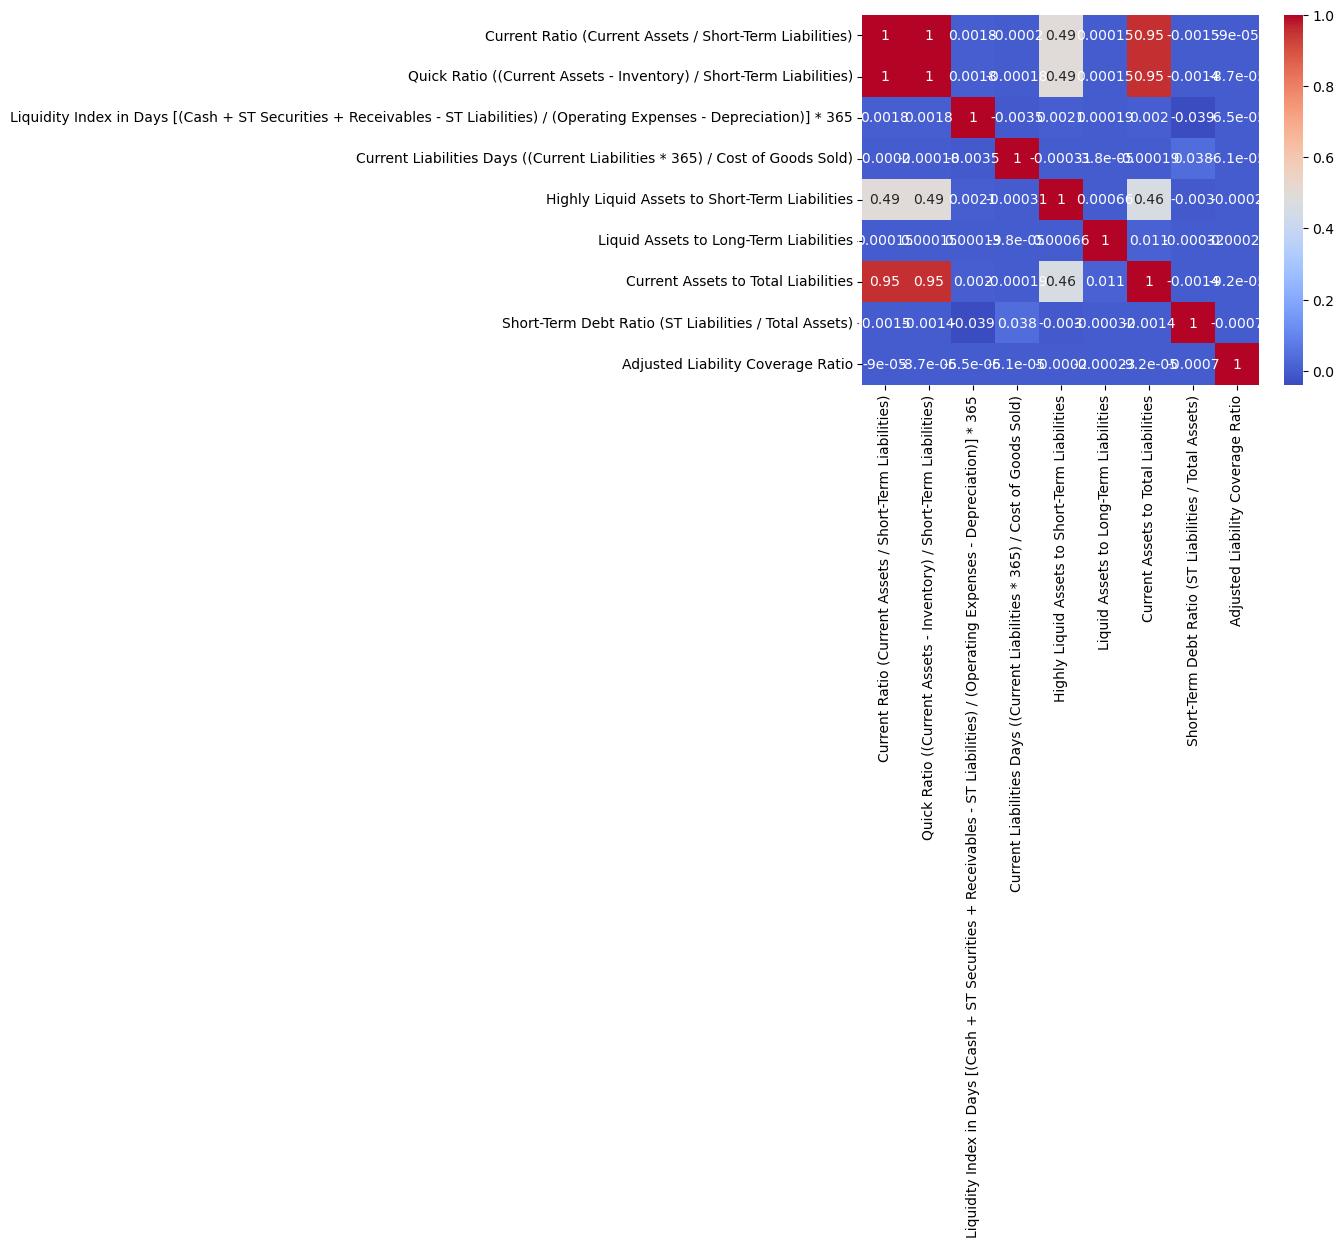

In [32]:
sns.heatmap(l_corr, annot=True, cmap='coolwarm')

In [33]:
X_liquidity = X_liquidity [['Current Ratio (Current Assets / Short-Term Liabilities)',
        'Liquidity Index in Days [(Cash + ST Securities + Receivables - ST Liabilities) / (Operating Expenses - Depreciation)] * 365',
        'Current Liabilities Days ((Current Liabilities * 365) / Cost of Goods Sold)',
        'Liquid Assets to Long-Term Liabilities',
        'Short-Term Debt Ratio (ST Liabilities / Total Assets)',
        'Adjusted Liability Coverage Ratio'
    ]]

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_liquidity, y, test_size = 0.2, random_state = 42)

In [35]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train.values.ravel())

y_pred = model.predict(X_test)

In [37]:
print("Coefficients:", model.coef_)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Coefficients: [[-0.02205011  0.02288132  0.02647609 -0.02709897  3.85291935 -2.86837822]]
Confusion Matrix:
 [[5941 2299]
 [ 225  216]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.72      0.82      8240
           1       0.09      0.49      0.15       441

    accuracy                           0.71      8681
   macro avg       0.52      0.61      0.49      8681
weighted avg       0.92      0.71      0.79      8681

Accuracy Score: 0.7092500863955765


### Coefficients

Current Ratio	-0.02205	Higher current ratio slightly reduces bankruptcy risk.

Liquidity Index in Days	0.02288	Higher liquidity index slightly increases bankruptcy risk (might be counterintuitive—check data or context).

Current Liabilities Days	0.02648	More days of current liabilities relative to COGS slightly increases bankruptcy risk.

Liquid Assets to Long-Term Liabilities	-0.02710	Higher liquid assets relative to long-term liabilities slightly reduce bankruptcy risk.
Short-Term Debt Ratio	3.85292	Much higher short-term debt ratio greatly increases bankruptcy risk.

Adjusted Liability Coverage Ratio	-2.86838	Higher liability coverage ratio strongly reduces bankruptcy risk.

In [40]:
X_profit = X[[
        'Return on Assets (Net Profit / Total Assets)',
        'Operating Return on Assets (EBIT / Total Assets)',
        'Gross Return on Assets (Gross Profit / Total Assets)',
        'Adjusted ROA ((Gross Profit + Interest) / Total Assets)',
        'Operating Profitability (Operating Profit / Total Assets)',
        'Net Profit Margin (Net Profit / Sales)',
        'Gross Profit Margin (Gross Profit / Sales)',
        'Sales Profitability (Profit on Sales / Total Assets)',
        'Operating Margin (Profit on Operating Activities / Sales)',
        'EBITDA Margin (EBITDA / Sales)',
        'Profitability Margin ((Gross Profit + Depreciation) / Sales)',
        'Comprehensive Profit Margin ((Gross Profit + Interest) / Sales)',
        'Sales Profit Margin (Profit on Sales / Sales)'
    ]]

<Axes: >

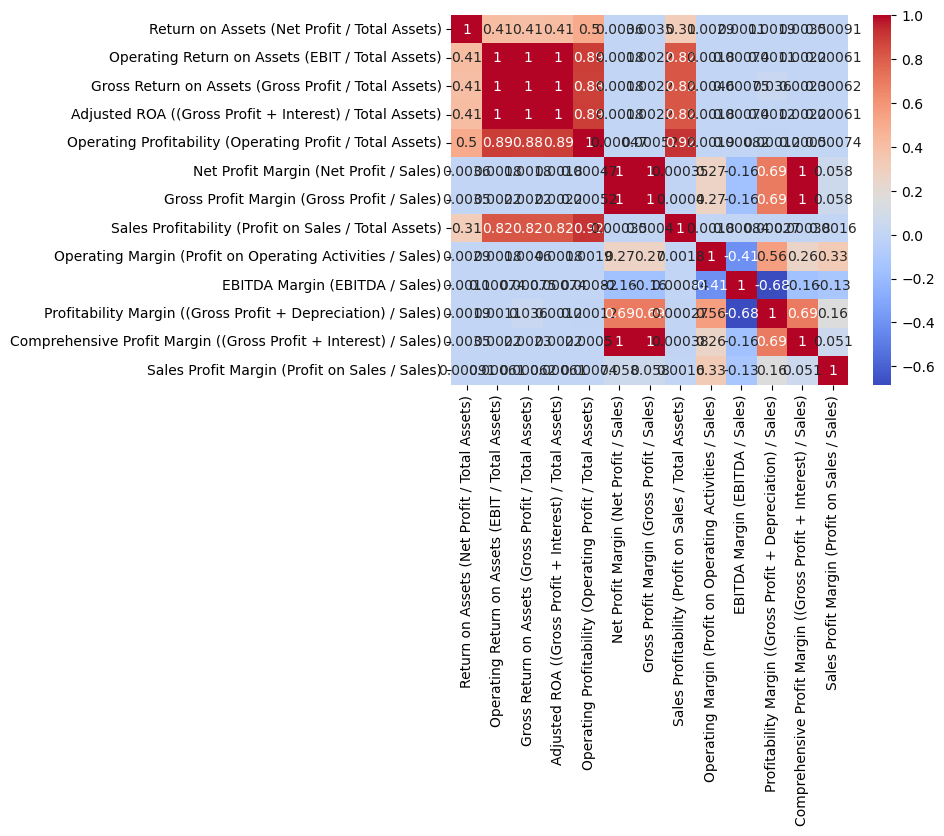

In [41]:
p_corr = X_profit.corr(method='pearson')

sns.heatmap(p_corr, annot=True, cmap='coolwarm')

In [42]:
X_profit = X_profit[[
        'Return on Assets (Net Profit / Total Assets)',
        'Operating Return on Assets (EBIT / Total Assets)',
        'Net Profit Margin (Net Profit / Sales)',
        'Sales Profitability (Profit on Sales / Total Assets)',
        'Operating Margin (Profit on Operating Activities / Sales)',
        'EBITDA Margin (EBITDA / Sales)',
        'Comprehensive Profit Margin ((Gross Profit + Interest) / Sales)',
        'Sales Profit Margin (Profit on Sales / Sales)'
    ]]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_profit, y, test_size = 0.2, random_state = 42)

In [44]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train.values.ravel())

y_pred = model.predict(X_test)

In [46]:
print("Coefficients:", model.coef_)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Coefficients: [[ -0.06123355   0.35279478  -1.71619877 -11.28449621   0.11854676
    1.17294202   1.34605808  -0.83841615]]
Confusion Matrix:
 [[5408 2832]
 [ 192  249]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.66      0.78      8240
           1       0.08      0.56      0.14       441

    accuracy                           0.65      8681
   macro avg       0.52      0.61      0.46      8681
weighted avg       0.92      0.65      0.75      8681

Accuracy Score: 0.6516530353645893


### Coefficients


Return on Assets (Net Profit / Total Assets)	-0.06123	Slight negative effect: higher ROA slightly decreases bankruptcy risk.
Operating Return on Assets (EBIT / Total Assets)	0.35279	Moderate positive effect: higher operating ROA increases bankruptcy risk (a bit unexpected).

Net Profit Margin (Net Profit / Sales)	-1.71620	Strong negative effect: higher net profit margin reduces bankruptcy risk significantly.

Sales Profitability (Profit on Sales / Total Assets)	-11.28450	Very strong negative effect: higher sales profitability greatly lowers bankruptcy risk.

Operating Margin (Profit on Operating Activities / Sales)	0.11855	Slight positive effect: higher operating margin increases bankruptcy risk (unexpected).

EBITDA Margin (EBITDA / Sales)	1.17294	Moderate positive effect: higher EBITDA margin increases bankruptcy risk (unexpected).

Comprehensive Profit Margin ((Gross Profit + Interest) / Sales)	1.34606	Moderate positive effect: higher comprehensive profit margin increases bankruptcy risk (unexpected).

Sales Profit Margin (Profit on Sales / Sales)	-0.83842	Moderate negative effect: higher sales profit margin decreases bankruptcy risk.

In [49]:
X_leverage = X[[
        'Debt Ratio (Total Liabilities / Total Assets)',
        'Equity-to-Debt Ratio (Book Value of Equity / Total Liabilities)',
        'Assets-to-Liabilities Ratio (Total Assets / Total Liabilities)',
        'Equity Ratio (Equity / Total Assets)',
        'Return on Liabilities ((Gross Profit + Depreciation) / Total Liabilities)',
        'Adjusted Debt to Sales ((Total Liabilities - Cash) / Sales)',
        'Long-Term Debt to Equity Ratio'
    ]]

<Axes: >

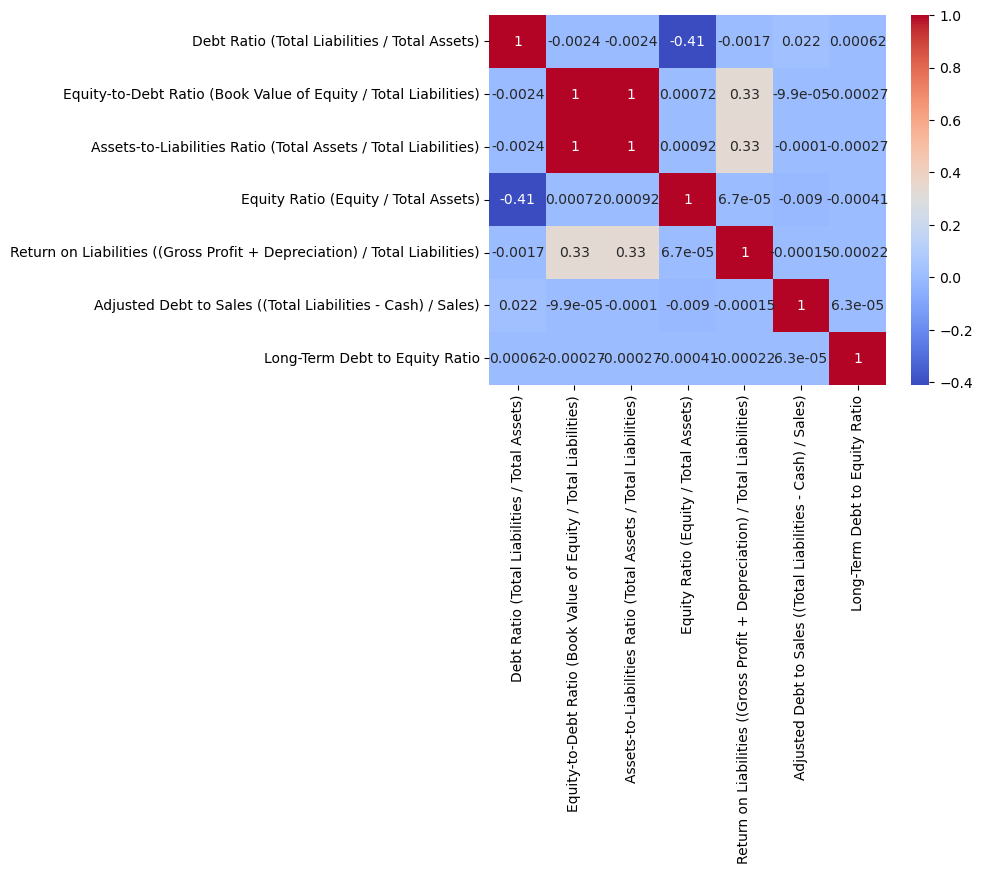

In [50]:
lev_corr = X_leverage.corr(method='pearson')
sns.heatmap(lev_corr, annot=True, cmap='coolwarm')

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_leverage, y, test_size = 0.2, random_state = 42)
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train.values.ravel())

y_pred = model.predict(X_test)

In [52]:
print("Coefficients:", model.coef_)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Coefficients: [[ 3.98812137e+00  7.44134467e-03 -4.85854795e-03  1.48772275e-02
  -7.54920289e-01 -1.97456331e-03 -7.78384328e-04]]
Confusion Matrix:
 [[5662 2578]
 [ 201  240]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.69      0.80      8240
           1       0.09      0.54      0.15       441

    accuracy                           0.68      8681
   macro avg       0.53      0.62      0.48      8681
weighted avg       0.92      0.68      0.77      8681

Accuracy Score: 0.6798755903697731


### Coefficients

Debt Ratio (Total Liabilities / Total Assets)	3.9881	Large positive effect: higher debt ratio strongly increases bankruptcy risk.

Equity-to-Debt Ratio (Book Value of Equity / Total Liabilities)	0.00744	Slight positive effect: higher equity-to-debt ratio slightly increases bankruptcy risk (unexpected, usually the opposite).

Assets-to-Liabilities Ratio (Total Assets / Total Liabilities)	-0.00486	Slight negative effect: higher assets-to-liabilities ratio slightly reduces bankruptcy risk (expected).

Equity Ratio (Equity / Total Assets)	0.01488	Slight positive effect: higher equity ratio slightly increases bankruptcy risk (unexpected).

Return on Liabilities ((Gross Profit + Depreciation) / Total Liabilities)	-0.7549	Moderate negative effect: higher return on liabilities reduces bankruptcy risk (expected).

Adjusted Debt to Sales ((Total Liabilities - Cash) / Sales)	-0.00197	Very slight negative effect: higher adjusted debt to sales slightly reduces bankruptcy risk (unexpected).

Long-Term Debt to Equity Ratio	-0.00078	Very slight negative effect: higher long-term debt to equity slightly reduces bankruptcy risk (unexpected).

In [55]:
X_efficiency = X[[
        'Asset Turnover Ratio (Sales / Total Assets)',
        'Inventory Days (Inventory * 365 / Sales)',
        'Receivables Collection Days ((Receivables * 365) / Sales)',
        'Inventory Turnover Days ((Inventory * 365) / Cost of Goods Sold)',
        'Total Asset Turnover (Total Sales / Total Assets)',
        'Inventory Turnover Ratio (Sales / Inventory)',
        'Fixed Asset Turnover (Sales / Fixed Assets)',
        'Sales Growth Ratio (Current Year Sales / Previous Year Sales)',
]]

<Axes: >

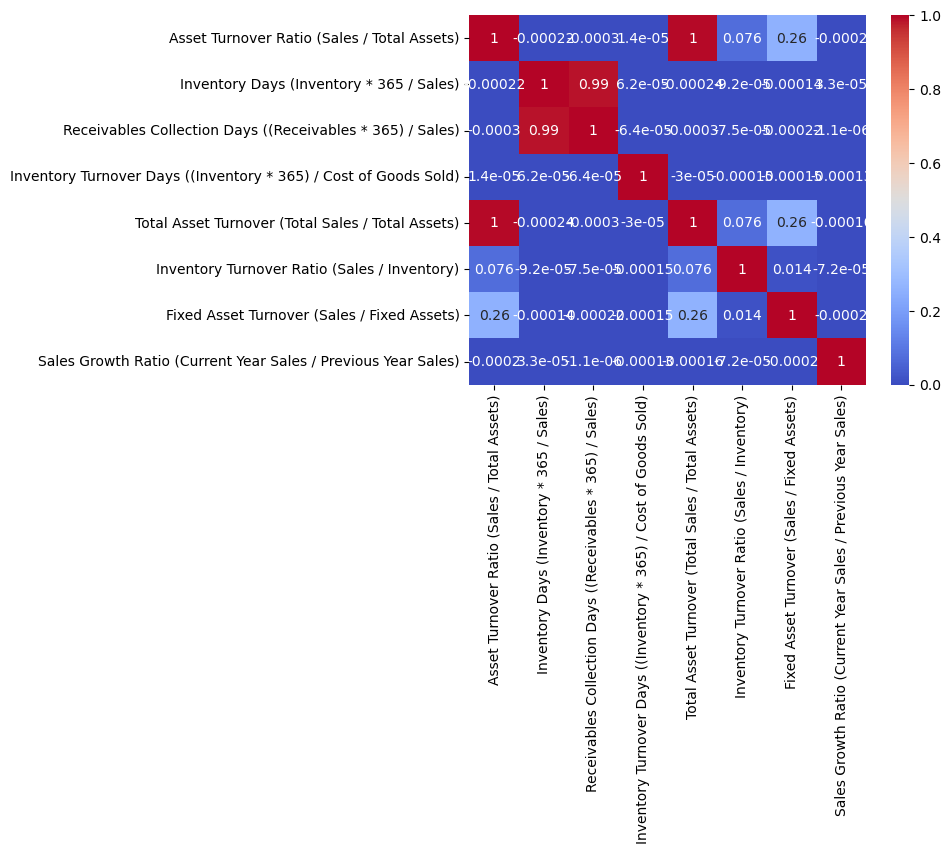

In [56]:
e_corr = X_efficiency.corr(method='pearson')
sns.heatmap(e_corr, annot=True, cmap='coolwarm')

In [57]:
X_efficiency = X_efficiency[[
        'Inventory Days (Inventory * 365 / Sales)',
        'Inventory Turnover Days ((Inventory * 365) / Cost of Goods Sold)',
        'Total Asset Turnover (Total Sales / Total Assets)',
        'Inventory Turnover Ratio (Sales / Inventory)',
        'Fixed Asset Turnover (Sales / Fixed Assets)',
        'Sales Growth Ratio (Current Year Sales / Previous Year Sales)',
]]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_efficiency, y, test_size = 0.2, random_state = 42)

scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train.values.ravel())

y_pred = model.predict(X_test)

In [59]:
print("Coefficients:", model.coef_)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Coefficients: [[-0.03083862 -0.31766262  0.00105078 -0.03715791  0.0195076  -0.03954424]]
Confusion Matrix:
 [[1065 7175]
 [  69  372]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.13      0.23      8240
           1       0.05      0.84      0.09       441

    accuracy                           0.17      8681
   macro avg       0.49      0.49      0.16      8681
weighted avg       0.89      0.17      0.22      8681

Accuracy Score: 0.16553392466305725


### Coefficients

Inventory Days (Inventory * 365 / Sales)	-0.0308	Slight negative effect: more inventory days slightly reduces bankruptcy risk.

Inventory Turnover Days ((Inventory * 365) / COGS)	-0.3177	Moderate negative effect: more inventory turnover days reduces bankruptcy risk.

Total Asset Turnover (Total Sales / Total Assets)	0.00105	Negligible positive effect: higher asset turnover very slightly increases bankruptcy risk.

Inventory Turnover Ratio (Sales / Inventory)	-0.0372	Slight negative effect: higher inventory turnover ratio slightly reduces bankruptcy risk.

Fixed Asset Turnover (Sales / Fixed Assets)	0.0195	Slight positive effect: higher fixed asset turnover slightly increases bankruptcy risk.

Sales Growth Ratio (Current Year Sales / Previous Year Sales)	-0.0395	Slight negative effect: higher sales growth slightly reduces bankruptcy risk.

### Comprehensive Model

In [63]:
X_final = X[['Current Ratio (Current Assets / Short-Term Liabilities)', 'Liquid Assets to Long-Term Liabilities',
             'Operating Margin (Profit on Operating Activities / Sales)','EBITDA Margin (EBITDA / Sales)',
             'Comprehensive Profit Margin ((Gross Profit + Interest) / Sales)', 'Debt Ratio (Total Liabilities / Total Assets)', 
             'Return on Liabilities ((Gross Profit + Depreciation) / Total Liabilities)', 
             'Equity-to-Debt Ratio (Book Value of Equity / Total Liabilities)', 
             'Sales Growth Ratio (Current Year Sales / Previous Year Sales)']]

<Axes: >

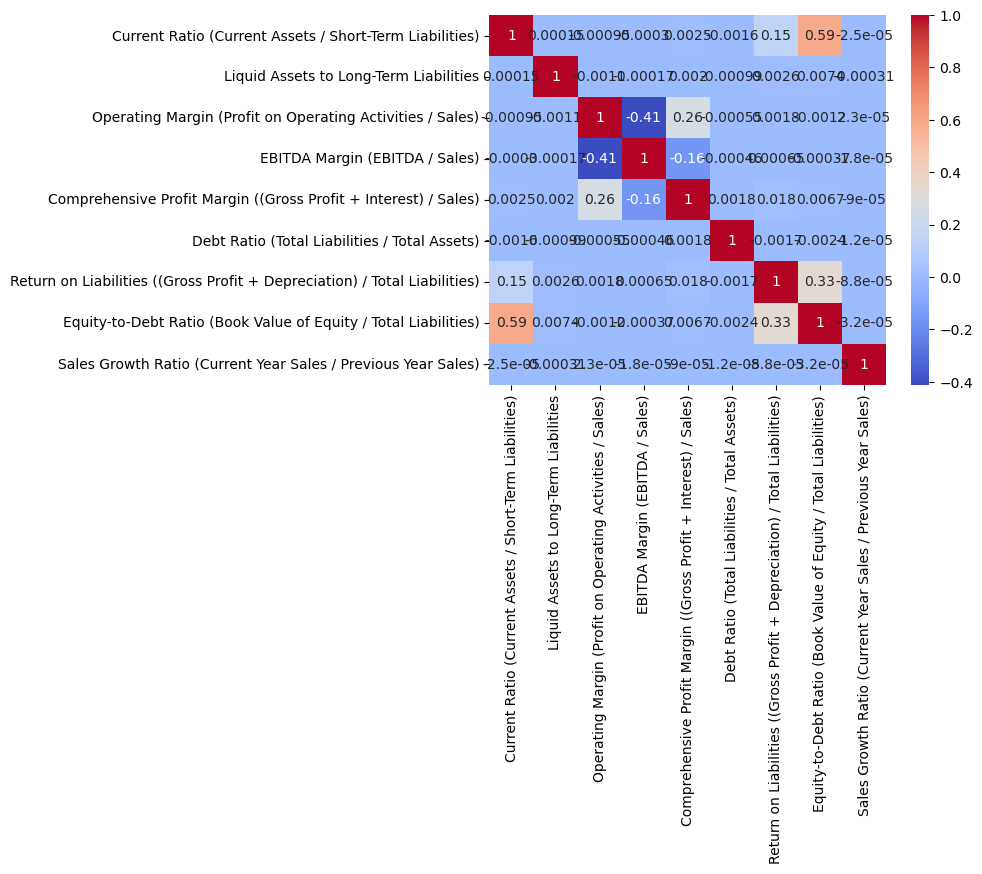

In [64]:
final_corr = X_final.corr(method='pearson')
sns.heatmap(final_corr, annot=True, cmap='coolwarm')

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size = 0.2, random_state = 42)

In [66]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train.values.ravel())

y_pred = model.predict(X_test)


print("Coefficients:", model.coef_)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Coefficients: [[-0.01407412 -0.0102654   0.05449808  0.02953345 -0.06191049  3.96518853
  -0.77340083  0.00680144 -0.05372268]]
Confusion Matrix:
 [[5650 2590]
 [ 200  241]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.69      0.80      8240
           1       0.09      0.55      0.15       441

    accuracy                           0.68      8681
   macro avg       0.53      0.62      0.47      8681
weighted avg       0.92      0.68      0.77      8681

Accuracy Score: 0.6786084552470913


### Final Coefficients

Current Ratio (Current Assets / Short-Term Liabilities)	-0.01407	Slight negative effect: higher current ratio slightly reduces bankruptcy risk.

Liquid Assets to Long-Term Liabilities	-0.01027	Slight negative effect: more liquid assets relative to long-term liabilities slightly reduce bankruptcy risk.

Operating Margin (Profit on Operating Activities / Sales)	0.05450	Slight positive effect: higher operating margin slightly increases bankruptcy risk (unexpected).

EBITDA Margin (EBITDA / Sales)	0.02953	Slight positive effect: higher EBITDA margin slightly increases bankruptcy risk (unexpected).

Comprehensive Profit Margin ((Gross Profit + Interest) / Sales)	-0.06191	Moderate negative effect: higher comprehensive profit margin reduces bankruptcy risk.

Debt Ratio (Total Liabilities / Total Assets)	3.96519	Very strong positive effect: higher debt ratio greatly increases bankruptcy risk (expected).

Return on Liabilities ((Gross Profit + Depreciation) / Total Liabilities)	-0.77340	Strong negative effect: higher return on liabilities reduces bankruptcy risk.

Equity-to-Debt Ratio (Book Value of Equity / Total Liabilities)	0.00680	Negligible positive effect: slightly increases bankruptcy risk (unexpected).

Sales Growth Ratio (Current Year Sales / Previous Year Sales)	-0.05372	Slight negative effect: higher sales growth slightly reduces bankruptcy risk.

### Key Takeaways

Sales Growth Ratio stands out as the most significant predictor, where strong growth in sales clearly reduces bankruptcy risk.

Debt-related metrics like the Debt Ratio and Equity-to-Debt Ratio show expected trends, with higher debt increasing bankruptcy risk and more equity relative to debt reducing bankruptcy risk.

Some of the profitability metrics like Operating Margin and EBITDA Margin show small positive effects on bankruptcy risk. This might suggest that highly profitable companies could be facing operational or financial inefficiencies that increase their exposure to bankruptcy.

The Liquid Assets to Long-Term Liabilities and Return on Liabilities ratios have relatively small effects on bankruptcy risk, but the negative relationship with Return on Liabilities is intuitive, as companies managing liabilities effectively are at lower risk.

In [72]:
X_valuation = X[[
        'Equity-to-Debt Ratio (Book Value of Equity / Total Liabilities)',
        'Return on Liabilities ((Gross Profit + Depreciation) / Total Liabilities)',
        'Gross Return on Assets (Gross Profit / Total Assets)',
        'Operating Profitability (Operating Profit / Total Assets)',
        'Equity Ratio (Equity / Total Assets)',
        'Retained Earnings to Total Assets',
        'Retained Equity to Total Assets ((Equity - Share Capital) / Total Assets)'
    ]]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_valuation, y, test_size = 0.2, random_state = 42)

In [74]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train.values.ravel())

LogisticRegression(class_weight='balanced', max_iter=1000)

In [76]:
y_pred = model.predict(X_test)

In [77]:
print("Coefficients:", model.coef_)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Coefficients: [[-0.0227402  -0.42606197 -0.13234455 -7.23528139  0.38783898 -0.01918612
  -3.1046236 ]]
Confusion Matrix:
 [[5920 2320]
 [ 205  236]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.72      0.82      8240
           1       0.09      0.54      0.16       441

    accuracy                           0.71      8681
   macro avg       0.53      0.63      0.49      8681
weighted avg       0.92      0.71      0.79      8681

Accuracy Score: 0.7091348922935146


### Coefficients

Equity-to-Debt Ratio (Book Value of Equity / Total Liabilities)	-0.0227	Slight negative effect: higher equity-to-debt ratio slightly reduces bankruptcy risk.

Return on Liabilities ((Gross Profit + Depreciation) / Total Liabilities)	-0.4261	Moderate negative effect: better return on liabilities reduces bankruptcy risk.

Gross Return on Assets (Gross Profit / Total Assets)	-0.1323	Slight negative effect: higher gross return on assets reduces bankruptcy risk.

Operating Profitability (Operating Profit / Total Assets)	-7.2353	Very strong negative effect: higher operating profitability significantly reduces bankruptcy risk.

Equity Ratio (Equity / Total Assets)	0.3878	Moderate positive effect: higher equity ratio increases bankruptcy risk (unexpected).

Retained Earnings to Total Assets	-0.0192	Slight negative effect: higher retained earnings relative to assets reduces bankruptcy risk.

Retained Equity to Total Assets ((Equity - Share Capital) / Total Assets)	-3.1046	Strong negative effect: higher retained equity reduces bankruptcy risk.

In [80]:
#Trying a DecisionTreeClassifier(Plug in different X variable groupings)

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_profit, y, test_size = 0.2, random_state = 42)

In [83]:
model = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=5)

In [84]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [85]:
y_pred = model.predict(X_test)

In [86]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[5458 2782]
 [ 148  293]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.66      0.79      8240
           1       0.10      0.66      0.17       441

    accuracy                           0.66      8681
   macro avg       0.53      0.66      0.48      8681
weighted avg       0.93      0.66      0.76      8681


Accuracy Score: 0.662481280958415


In [87]:
importance = model.feature_importances_

for i, score in enumerate(importance):
    print(f"{X_train.columns[i]}: {score:.4f}")

Return on Assets (Net Profit / Total Assets): 0.0305
Operating Return on Assets (EBIT / Total Assets): 0.0206
Net Profit Margin (Net Profit / Sales): 0.1447
Sales Profitability (Profit on Sales / Total Assets): 0.5195
Operating Margin (Profit on Operating Activities / Sales): 0.1777
EBITDA Margin (EBITDA / Sales): 0.0220
Comprehensive Profit Margin ((Gross Profit + Interest) / Sales): 0.0334
Sales Profit Margin (Profit on Sales / Sales): 0.0516


Text(0.5, 1.0, 'Feature Importance - Decision Tree')

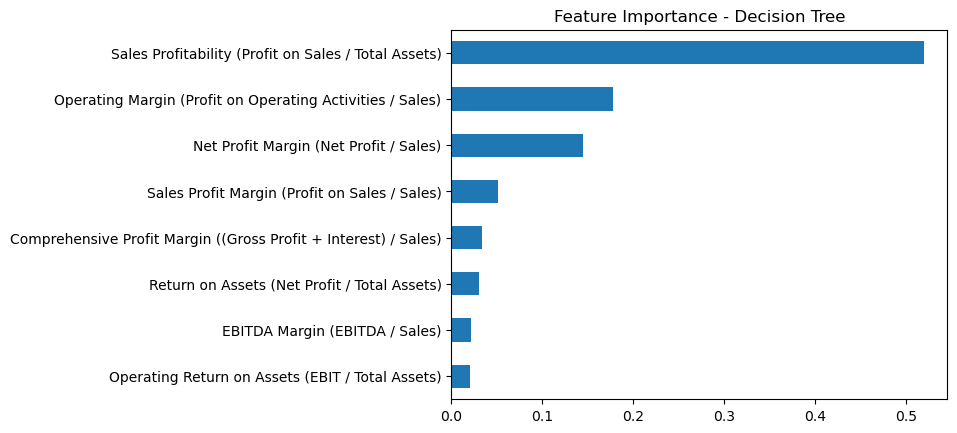

In [88]:
feat_importance = pd.Series(importance, index=X_train.columns)
feat_importance.sort_values().plot(kind='barh')
plt.title("Feature Importance - Decision Tree")

In [89]:
#Trying Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_liquidity, y, test_size=0.3, random_state=42)

In [92]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

In [181]:
rf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(class_weight='balanced', random_state=42)

In [182]:
y_pred = rf.predict(X_test)

In [183]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[12296    79]
 [  629    18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     12375
           1       0.19      0.03      0.05       647

    accuracy                           0.95     13022
   macro avg       0.57      0.51      0.51     13022
weighted avg       0.91      0.95      0.93     13022


Accuracy Score: 0.9456304715097528


In [187]:
importance = rf.feature_importances_

for i, score in enumerate(importance):
    print(f"{X_train.columns[i]}: {score:.4f}")

Current Ratio (Current Assets / Short-Term Liabilities): 0.1774
Liquidity Index in Days [(Cash + ST Securities + Receivables - ST Liabilities) / (Operating Expenses - Depreciation)] * 365: 0.1734
Current Liabilities Days ((Current Liabilities * 365) / Cost of Goods Sold): 0.1440
Liquid Assets to Long-Term Liabilities: 0.0872
Short-Term Debt Ratio (ST Liabilities / Total Assets): 0.1804
Adjusted Liability Coverage Ratio: 0.2376


Text(0.5, 1.0, 'Feature Importance - Random Forest Classifier')

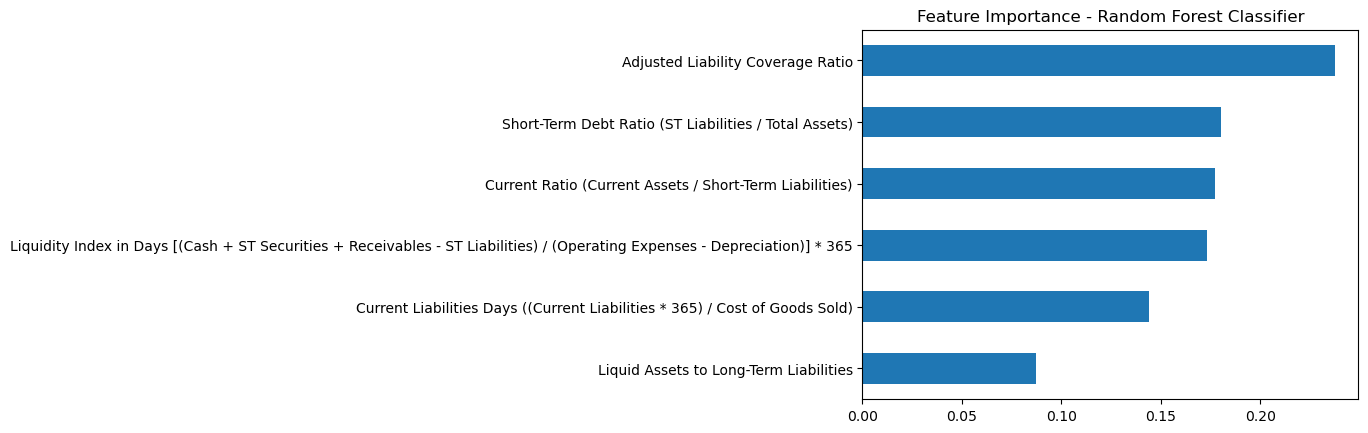

In [189]:
feat_importance = pd.Series(importance, index=X_train.columns)
feat_importance.sort_values().plot(kind='barh')
plt.title("Feature Importance - Random Forest Classifier")

In [191]:
#Trying XGB (Plug in X variable groupings)

In [193]:
import xgboost as xgb

In [194]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_encoded = le.fit_transform(np.ravel(y))

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X_profit, y_encoded, test_size=0.2, random_state=42)

In [196]:
model = xgb.XGBClassifier(
    eval_metric='logloss', 
    random_state=42,
    scale_pos_weight= (sum(y_encoded == 0) / sum(y_encoded == 1))
)

In [197]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [198]:
y_pred = model.predict(X_test)

In [199]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[7089 1151]
 [ 274  167]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91      8240
           1       0.13      0.38      0.19       441

    accuracy                           0.84      8681
   macro avg       0.54      0.62      0.55      8681
weighted avg       0.92      0.84      0.87      8681

Accuracy Score: 0.8358484045616864


In [201]:
importance = model.feature_importances_

for i, score in enumerate(importance):
    print(f"{X_train.columns[i]}: {score:.4f}")

Return on Assets (Net Profit / Total Assets): 0.0872
Operating Return on Assets (EBIT / Total Assets): 0.1044
Net Profit Margin (Net Profit / Sales): 0.1398
Sales Profitability (Profit on Sales / Total Assets): 0.1435
Operating Margin (Profit on Operating Activities / Sales): 0.1399
EBITDA Margin (EBITDA / Sales): 0.1185
Comprehensive Profit Margin ((Gross Profit + Interest) / Sales): 0.1047
Sales Profit Margin (Profit on Sales / Sales): 0.1621


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

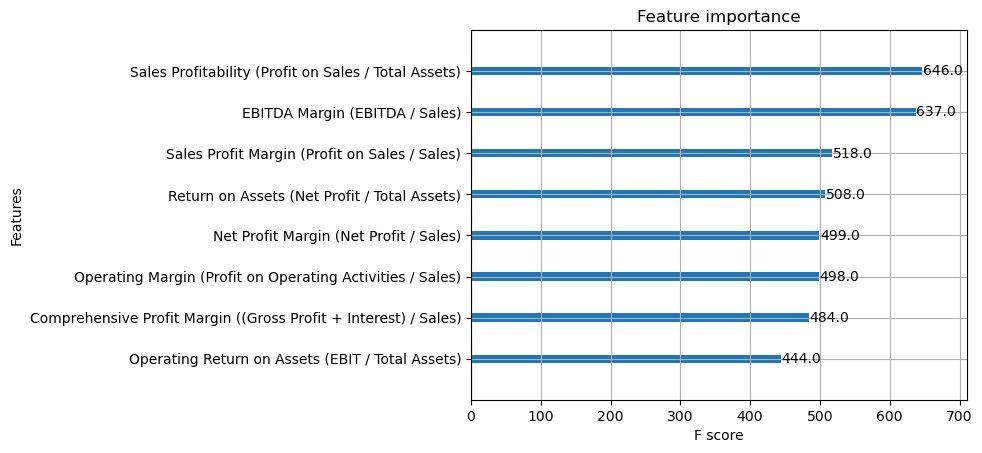

In [202]:
xgb.plot_importance(model)